In [10]:
import pandas as pd
import torch 
import numpy as np
from diabnet.ensemble import Ensemble
from diabnet.data import encode_features, get_feature_names
import matplotlib.pyplot as plt

In [85]:
ensemble = Ensemble('../results/models/positive/model-positive-11-adamw-lc3-2021-10-05')

In [86]:
feature_names = get_feature_names("../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv")

In [87]:
df = pd.read_csv("../data/datasets/maira/dnabr_hg19_t2d.csv", index_col=0)
df = df[feature_names]

In [88]:
df['AGE'] = 50
df['sex'] = 'X'
df['mo_t2d'] = 2
df['fa_t2d'] = 2

In [89]:
# c = ['snp_6_78992097', 'snp_4_172986805', 'snp_20_32074430',
#        'snp_1_156839022', 'snp_11_97227369', 'snp_8_37202618',
#        'snp_7_78732800', 'snp_13_26574243']
c = ['snp_6_165743115', 'snp_4_68837742', 'snp_6_165743113',
       'snp_1_48212615', 'snp_16_86713635', 'snp_10_49864260',
       'snp_1_10890345', 'snp_19_4278502', 'snp_10_15653812',
       'snp_11_25435300', 'snp_1_48196380', 'snp_19_4243792',
       'snp_19_4245811', 'snp_6_115237279', 'snp_2_236228364',
       'snp_16_86714205', 'snp_6_157707337', 'snp_19_4242521',
       'snp_2_236228365', 'snp_1_202135137', 'snp_5_137301920',
       'snp_5_137332882', 'snp_6_31326613', 'snp_6_31326612',
       'snp_7_152568711', 'snp_2_1148576', 'snp_11_26066615',
       'snp_3_129437479', 'snp_3_129453798', 'snp_2_630555',
       'snp_6_44264681', 'snp_15_35738419', 'snp_8_1879973',
       'snp_6_78992097', 'snp_19_20472073', 'snp_4_172986805',
       'snp_6_13149321', 'snp_1_28266957', 'snp_5_114737203',
       'snp_11_48771041', 'snp_12_105480313', 'snp_20_32074430',
       'snp_1_156839022', 'snp_11_97227369', 'snp_21_22610877',
       'snp_8_37202618', 'snp_7_78732800', 'snp_13_26574243',
       'snp_18_43457230', 'snp_21_33452974']
for i in c:
    df[i] = (df[i] - 2)*-1

In [90]:
samples = torch.Tensor([encode_features(feature_names, v) for v in df.values])

In [91]:
results = np.array([np.mean(ensemble.apply(torch.unsqueeze(s, 0))) for s in samples])

(array([ 90.,  46.,  70.,  50.,  73.,  57.,  78., 122., 181., 796.]),
 array([1.41786040e-05, 1.00012764e-01, 2.00011343e-01, 3.00009936e-01,
        4.00008500e-01, 5.00007093e-01, 6.00005686e-01, 7.00004280e-01,
        8.00002813e-01, 9.00001407e-01, 1.00000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

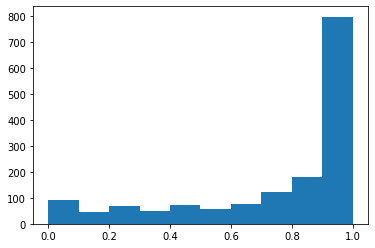

In [92]:
plt.hist(results)

In [93]:
np.sum(results > .5)/len(results)

0.7895073576455535

363

In [16]:
ensemble.apply(samples)

array([1.        , 1.        , 0.999995  , 1.        , 1.        ,
       0.9999999 , 1.        , 1.        , 1.        , 0.9999982 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9999988 , 1.        , 0.99999845, 1.        ,
       1.        , 1.        , 0.9999968 , 1.        , 0.9999962 ,
       1.        , 1.        , 1.        , 0.99999714, 1.        ,
       0.9999976 , 1.        , 0.9999976 , 1.        , 1.        ,
       1.        , 1.        , 0.99999714, 1.        , 0.9999999 ,
       0.99999964, 1.        , 0.9999958 , 1.        , 1.        ,
       0.99997663, 0.99999833, 1.        , 1.        , 0.99999166,
       0.9999982 , 1.        , 0.9999964 , 1.        , 0.9999989 ,
       1.        , 1.        , 0.86117786, 1.        , 0.9999999 ,
       1.        , 1.        , 1.        , 0.9999988 , 1.        ,
       0.9999906 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9999962 , 1.        , 1.     

In [9]:
samples

tensor([[[2., 2., 1.,  ..., 0., 0., 2.],
         [0., 0., 1.,  ..., 0., 0., 0.]],

        [[2., 2., 2.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[2., 2., 2.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[2., 2., 1.,  ..., 0., 0., 2.],
         [0., 0., 1.,  ..., 0., 0., 0.]],

        [[2., 2., 2.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[2., 2., 2.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])